# Final Exam

## FINM 37400 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is 180 points.
* You have 180 minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.
Final Exam

Submission
* You will upload your solution to the Final Exam assignment on Canvas, where you downloaded this.
* Your submission should be readable, (the graders can understand your answers,) and it should include all code used in your analysis in a file format that the code can be executed. (ie. .ipynb preferred, .pdf is unacceptable.)

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation, (only for this exam.)

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:

### Sections 2, 3, 4
* `treasury_ts_2020-08-15.xlsx`

If you get stuck on 2.2, you can replace that answer with the data in 
* `simplified_spot_discounts_2022-12-30.xlsx`

But if you solve 2.2, then you'll have no use/need of this data.

### Section 5
* `treasury_ts_2020-08-15.xlsx`

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 50     |
| 2       | 25     |
| 3       | 35     |
| 4       | 20     |
| 5       | 50     |

# 1. Short Answer

### No Data Needed

These problem does not require any data file. Rather, analyze the situation conceptually, based on the information below. 

A few questions may require simple arithmetic.

## 1.1 (5pts)

True or False: The spot rate prices a particular security, and YTM prices any cashflow at a particular maturity.

Explain your answer.

**FALSE:** The spot/zero rate curve is the interest rate derived from riskless bonds that can be applied to any fixed income as a function of maturity. The YTM is the interest rate applied to each cash flow to find the current price. Bond's sell at discount if the YTM is greater than the coupon, whereas they sell at a premium if the YTM is less than the coupon. 

## 1.2 (5pts)

Suppose the duration of a bond is 7.0. The current price of the bond is 99.8 and the YTM of the bond is 3.27\%. 

The spot-rate curve moves up in a parallel shift by 10bps. 

* What is the approximate price of the bond after the shift?

* Do you suspect this approximation is an underestimate or overestimate? 



The approximate price of the bond equals $99.8 + -7\times 99.8 *(0.001) $
- Generally, the approximation is an underestimate in the change of price. 

In [2]:
def duration_price_bond(current_price, duration, bps_shift = .001):
    dollar_duration = -current_price*duration
    delta_change_price = dollar_duration*(bps_shift)
    new_price = current_price+delta_change_price
    return f"The bond's approximate price is {new_price}."

In [3]:
duration_price_bond(99.8,7,0.001)

"The bond's approximate price is 99.1014"

## 1.3 (5pts)

Are duration-based approximations of bond prices more accurate for a Treasury with high coupon rate or low coupon rate, (holding other things, like time-to-maturity, equal?)

- Duration based approximations for Treasuries are more accurate for lower coupons. 

## 1.4 (5pts)

Which tend to be less smooth: spot curves or forward curves? 

Explain.

**ANSWER:** Forward curves will tend to be less smooth because the foward curve is a derivative of the spot curve. Essentially, the foward curve is the rate that is implied by the spot curve within a given time interval.
- Given certain macroeconomic factors, the forward curve will change in greater of magnitude if the underlying financial market dynamics slightly change. 

## 1.5 (5pts)

True or False: Bond prices and returns have nearly zero serial correlation.

Explain your answer.

**False**: Bond prices and returns are serially correlated. The reason why is that when the YTM increases, it means that the expected return on this particular issue is higher because the price of the bond declined. The opposite is true when the yield declines.

## 1.6 (5pts)

As of Dec 2022, the yield curve is "inverted"?

Does this inversion mathematically imply that expected future spot rates will decline, or is there potentially another explanation?

- Yield curve inversion could mean two other things given what we reviewed in the class/cases: (1) Expected future GDP growth is expected to decline indicating a recession, and (2) the risk/term premium applied to long-term bonds is tighter causing the yield curve to flatten. 

## 1.7 (5pts)

Suppose we want to estimate a discount curve from a set of Treasuries.

If there are dates where multiple treasuries pay a coupon yet none expire, which of our estimation methods have trouble?
* Bootstrap
* OLS
* Nelson-Siegel

Explain.

The bootstrap and ols method will have trouble extrapolating across the missing dates. The result will be an overfit model where the discount's applied to the missing dates will be extremley off. 

## 1.8 (5pts)

Suppose that yesterday you built a position
* long a 10-year floating-rate note that resets quarterly
* short a 5-year floating-rate note that resets annually

Is your duration positive or negative? How about four years from today?

Explain.



The duration of the long position would be approximately $0.25$ and the duration of the short position would be -$1.00$. The net duration is -$0.75$.
Four years from today the duration will be the same because floating rate notes coupons reset at their cashflow dates. 

## 1.9 (10pts)

### Situation
Suppose it is Aug 15, 2022. We observe the following annual rates, (semiannually compounded):
* 7-year T-note (newly issued) has a price of par, with a coupon of 3.50%.
* 7-year swap (semi-annual, SOFR) has a swap rate of 3.00%.

*Assume the floating leg equals the repo rate and timing.*

### 1.9.1
**Conceptually**, explain the short and long positions you wouldl take (on notional of \\$100 million) in order to try to profit on this spread **diverging** further, meaning the treasury rate going higher relative to the swap rate.

**Answer:** In order to profit off the spread diverging I would enter into a SWAP agreement as a *floating-rate* payer and take a corresponding short position on the 7-year Note. 

### 1.9.2

Suppose that it is February 15, 2023, immediately after the swap has reset and the cashflows of the trade were settled.

In the market, we observe the following:
* The 5-year swap rate is 3.50%.
* The 5-year Treasury has a yield-to-maturity of 4.25%. 

**Conceptually**, How has the value changed between over the six months of each component of the trade?
* swap 
* T-note

**Answer:** 
- The value of the Treasury note would trade at a discount, however, since I am short the treasury note, I would profit off yield rising. Additionally, the value of the SWAP from my position would be positive since a SWAP contract can be broken up into a floating rate bond priced at par and a coupon bond with a rate of $3.00%$. Since I the value of the fixed leg would decline because the 5-year swap rate increased the value of the SWAP contract would be positive.

- Overall, my trade would be in a great position to profit off the spread diverging. 

***

# 2 Basic Pricing

Use the selected treasury quotes in the file, `selected_treasury_quotes_quotes_2022-12-30.xlsx`.

Data is provided on 10 Treasury issues which mature every six months over the next five years.

*You are welcome to assume that the issues mature in exactly half-year increments, notwithstanding that in actual trading they may have day-count issues causing them to be slightly above/below half-year increments.*

In [10]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
%matplotlib inline
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
from treasury_cmds import *

In [8]:
selected_treasury_path = 'C:/Users/dcste/OneDrive/fixed_income/fixed_income_FORKED/finm-fixedincome-2023/data/selected_treasury_quotes_2022-12-30.xlsx'
quotes = pd.read_excel(selected_treasury_path, sheet_name='quotes').set_index('KYTREASNO')

In [21]:
quotes['maturity date'] = pd.to_datetime(quotes['maturity date'])

- Since we are looking at them from the perspective of the last issue date of the columns I will set the quote date to be equal to *2022-12-31.*

In [39]:
QUOTE_DATE = '2022-12-31'
t_current = pd.to_datetime(QUOTE_DATE)
CASH_FLOW = pd.DataFrame(data = 0, index = quotes.index, columns=quotes['maturity date'])

for id in quotes.index:
    coupon_dates = get_coupon_dates(t_current, pd.to_datetime(quotes.loc[id,'maturity date']))

    if coupon_dates is not None:
        CASH_FLOW.loc[id,coupon_dates] = quotes.loc[id,'coupon rate']/2

    CASH_FLOW.loc[id,quotes.loc[id,'maturity date']] += 100


CASH_FLOW = CASH_FLOW.resample('m', axis = 1).sum()
CASH_FLOW.drop(columns=CASH_FLOW.columns[(CASH_FLOW ==0).all()], inplace=True)
CASH_FLOW = CASH_FLOW.fillna(0).sort_index(axis=1)




## 2.1 (5pts)

Calculate the cashflow matrix for the treasury issues.

Display the table.

In [42]:
CASH_FLOW

maturity date,2023-06-30,2023-12-31,2024-06-30,2024-12-31,2025-06-30,2025-12-31,2026-06-30,2026-12-31,2027-06-30,2027-12-31
KYTREASNO,,,,,,,,,,
206990,100.6875,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207047,1.1250,101.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207374,0.8750,0.8750,100.8750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207166,1.1250,1.1250,1.1250,101.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207224,1.3750,1.3750,1.3750,1.3750,101.3750,0.0000,0.0000,0.0000,0.0000,0.0000
207652,0.1875,0.1875,0.1875,0.1875,0.1875,100.1875,0.0000,0.0000,0.0000,0.0000
207731,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,100.4375,0.0000,0.0000,0.0000
207821,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,100.6250,0.0000,0.0000
207561,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,100.2500,0.0000


## 2.2 (5pts)

Use the bootstrap (or OLS) to extract the spot discount factors from this data, over the maturity range of 0.5 to 5, in half-year increments.

### Note: If you couldn't extract spot discount factors...

Several problems below make use of the spot discounts on Dec 30, 2022.

**If you were unable to calculate the answer to 2.3,** feel free to use the simplified discount factors, $Z(t,T)$ provided in the file `simplified_spot_discounts_2022-12-30.xlsx`.

Note that the rates in this file are simplified and won't match the answer you'll get if you solve Problem 2.2 above, so don't try to check your answer with them.

If you are proceeding with the simplified rates rather than your estimates in 2.2, **state that clearly.**

And again, this is **just provided as a help for anyone who couldn't solve 2.2**, so that they can continue with 2.3-2.5, as well as other problems in the exam.

In [47]:
frequency = 2
curves = pd.DataFrame(np.linalg.solve(CASH_FLOW,quotes.price.loc[CASH_FLOW.index]), index = CASH_FLOW.index, columns=['discount factor'])
curves.insert(0,'maturity', quotes['maturity'])
curves = curves.reset_index().set_index('maturity')
curves['spot_rate'] = discount_to_intrate(curves['discount factor'], curves.index,n_compound=frequency)
curves['CC_Spot_Rate'] = discount_to_intrate(curves['discount factor'], maturity=curves.index)

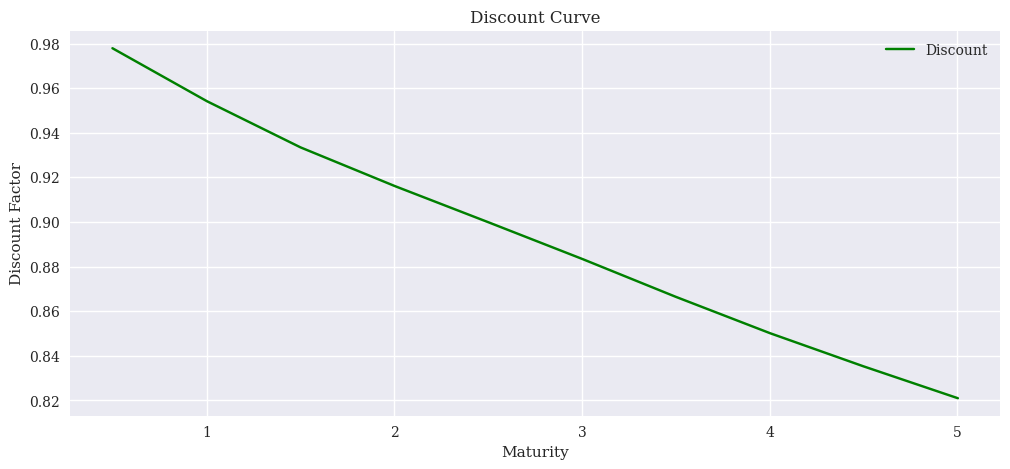

In [56]:
# ploting discount curve
fig, ax = plt.subplots(1,1,figsize=(12,5))
plt.plot(curves['discount factor'], c = 'g', label = 'Discount')
plt.title('Discount Curve')
plt.ylabel('Discount Factor')
plt.xlabel('Maturity')
plt.legend(loc = 0)

## 2.3 (5pts)

Report the 
* semi-annually-compounded spot discount **rates** derived from the discount factors above.
* continuously-compounded spot rates.

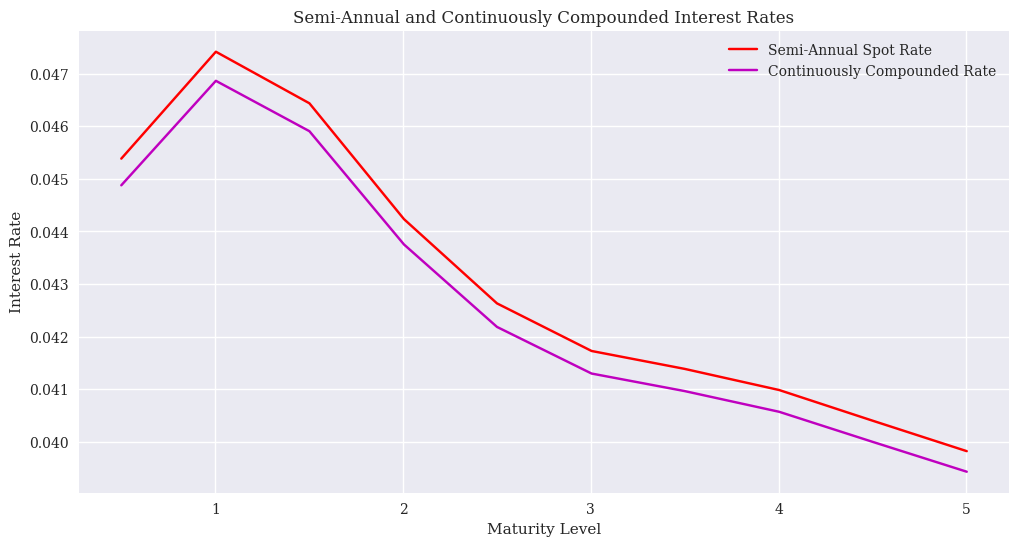

In [57]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
plt.plot(curves['spot_rate'], c = 'r', label = 'Semi-Annual Spot Rate')
plt.plot(curves['CC_Spot_Rate'], c = 'm', label = 'Continuously Compounded Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Maturity Level')
plt.title('Semi-Annual and Continuously Compounded Interest Rates')
plt.legend(loc = 0)

## 2.4 (3pts)

Without any calculation, just looking at your spot rates from 2.3, is the long-end of the forward curve below or above the spot-rate curve? How do you know?

**Answer:** The long-end of the forward curve is below the current spot-rate curve because the spot rate curve is inverted as time-to-maturity increases.  

## 2.5 (7pts)
Calculate and report the continuously-compounded forward-rate curve, $f(t,T,T+1)$, for $0\le T \le 4$.

Also report the forward rate, $f(t,T_1,T_2)$, for $T_1=3, T_2=5$.

In [91]:
forward_curve = pd.DataFrame(curves['discount factor'].values/curves['discount factor'].shift().values,\
     index = curves.index, columns=['Forward_Discount_Factor'])
forward_curve['Forward_Discount_Factor'].iloc[0] = curves['discount factor'].iloc[0]
forward_curve['CC_Forward_Rate'] = -np.log(forward_curve['Forward_Discount_Factor'])/forward_curve.index.to_series().diff().mean()

$f(t,T_1,T_2)$, for $T_1=3, T_2=5$  is equal to the difference between the continuously compounded forward rates at $T = 3\ and\ T = 5$

In [100]:
f_rate = 0.034559- 0.037142
f_rate = np.round(f_rate,5)*100

In [101]:
print(f'The forward rate from T= 5 to T = 3 is {f_rate}%')

The forward rate from T= 5 to T = 3 is -0.258%


<AxesSubplot:title={'center':'CC Forward Rate'}, xlabel='maturity'>

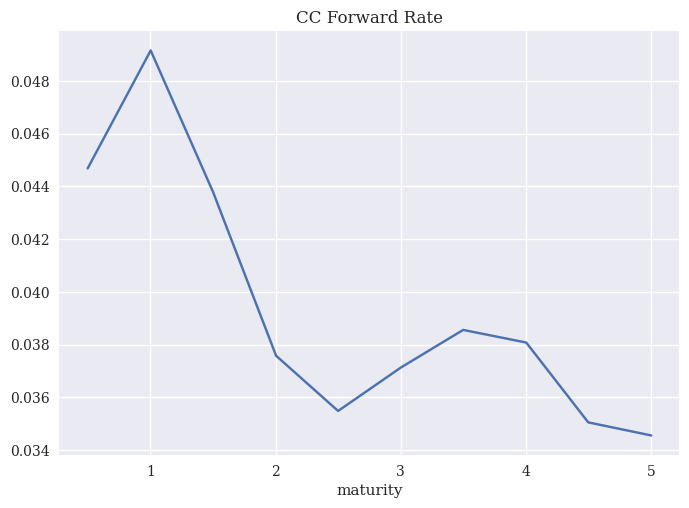

In [105]:
forward_curve['CC_Forward_Rate'].plot(title = "CC Forward Rate")

<AxesSubplot:xlabel='maturity'>

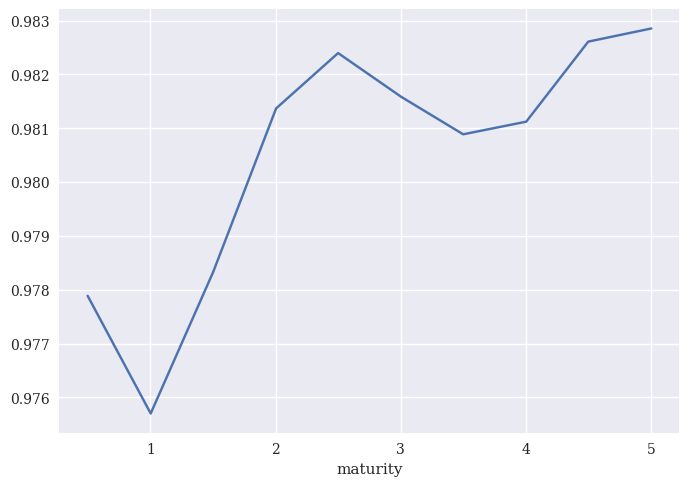

In [104]:
forward_curve['Forward_Discount_Factor'].plot()

***

# 3 An Amortized Bond

Suppose the Treasury announces a new type of bond, the **zero-coupon amortized bond** which works as follows:
* it pays the \\$100 face value evenly and annually over the life of the bond.
* it does not pay any additional coupon.

In particular, consider a five-year amortized bond:
* it pays \\$10 twice per year for the next 5 years.
* it does **not** pay any extra principal when it matures at 5 years--just the usual \\$10 payment.

,KYTREASNO,discount factor,spot_rate,CC_Spot_Rate
maturity,,,,
0.498289,206990,0.977886,0.045384,0.044877
1.002053,207047,0.954124,0.047419,0.046865
1.500342,207374,0.933443,0.046437,0.045907
2.004107,207166,0.916052,0.044233,0.043751
2.499658,207224,0.899927,0.042630,0.042182
3.003422,207652,0.883355,0.041725,0.041296
3.498973,207731,0.866473,0.041384,0.040962
4.002738,207821,0.850116,0.040982,0.040568
4.498289,207561,0.835333,0.040401,0.039998


## 3.1 (5pts)

Use the spot discount factors from Problem 2 to price this new security as of December 30, 2022.

In [ ]:
def price_treasury_ytm(time_to_maturity, ytm, cpn_rate=100,freq=2,face=100):
    c = cpn_rate/freq
    y = ytm/freq
    
    tau = round(time_to_maturity * freq)
    
    pv = 0
    for i in range(1,tau):
        pv += 1 / (1+y)**i
    
    pv = c*pv + (1+c)/(1+y)**tau
    pv *= face
    
    return pv

## 3.2 (5pts)

Calculate the YTM of this new **amortized bond**.

## 3.3 (5pts)

Conceptually speaking, should the duration of this amortized bond be higher or lower than a typical zero-coupon, five-year treasury bond?

And its convexity?

## 3.4 (7pts)

Calculate the (Macauley) duration of this **amortized** bond.

## 3.5 (6pts)

Calculate the convexity of this amortized bond.

## 3.6 (7pts)

Suppose you want to go long this amortized bond but hedge your duration by shorting the 5-year Treasury reported in `selected_treasury_quotes_quotes_2022-12-30.xlsx`.

For each long contract of the 5-year amortized, how many contracts should you short of the vanilla 5-year Treasury?

***

# 4 Expectations Hypothesis

Continue using the rates from Dec 30, 2022 introduced in Problem 2 above.

## 4.1 (5pts)

Use the Expectations Hypothesis to get a forecast the one-year spot rate that will be available in December of the following four years, (2023, 2024, 2025, 2026.)

## 4.2 (5pts)

Based on evidence we reviewed of the Expectations Hypothesis, do you expect the forecasts above are too high or low? Explain.

## 4.3 (5pts)

Suppose that the following month, January 2023, we observe that the forward rates have increased. Is it likely that the future spot rates (in Jan 2023, 2024, 2025, 2026) will increase as well? Explain.

## 4.4 (5pts)

As of December 2022, describe (conceptually) the "carry trade" you would recommend an investor implement..

***

# 5 Long-Short Convergence Trade

Consider a long-short convergence trade on `2019-08-29`.

* Both securities mature on **2020-08-15**.
* One is a 30-year **bond** and the other is a 10-year **note**.

Find data needed for the analysis in `treasury_ts_2020-08-15.xlsx`.

Note:
* Use the YTM as given in the field `TDYLD`. Multiply by 365.25 to convert it to an annual yield.
* Use the (Macauley) duration given in `TDDURATN`, divided by 365.25 to annualize it.

In [144]:
file_path = 'C:/Users/dcste/OneDrive/fixed_income/fixed_income_FORKED/finm-fixedincome-2023/data/treasury_ts_2020-08-15.xlsx'
treasury_info = pd.read_excel(file_path, sheet_name='info', index_col= 0)
treasury_info.columns = treasury_info.iloc[0]
ts_data = pd.read_excel(file_path, sheet_name='database')
ts_data.columns = ts_data.columns.str.upper()
ts_data

,KYTREASNO,KYCRSPID,CALDT,TDBID,TDASK,TDNOMPRC,TDNOMPRC_FLG,TDSOURCR,TDACCINT,TDRETNUA,TDYLD,TDDURATN,TDPUBOUT,TDTOTOUT,TDPDINT,TDIDXRATIO,TDIDXRATIO_FLG
0,204074,2.020082e+07,1993-04-13,122.593750,122.656250,122.625000,M,R,1.377762,0.001204,0.000186,4387.142817,21009.0,21419.0,0.0,NaN,NaN
1,204074,2.020082e+07,1990-08-10,99.562500,99.625000,99.593750,M,R,0.000000,NaN,0.000235,4021.731911,NaN,NaN,0.0,NaN,NaN
2,204074,2.020082e+07,1990-08-13,99.187500,99.250000,99.218750,M,R,0.000000,-0.003765,0.000236,4006.695342,NaN,NaN,0.0,NaN,NaN
3,204074,2.020082e+07,1990-08-14,99.656250,99.718750,99.687500,M,R,0.000000,0.004724,0.000235,4017.732737,NaN,NaN,0.0,NaN,NaN
4,204074,2.020082e+07,1990-08-15,99.843750,99.906250,99.875000,M,R,0.000000,0.001881,0.000235,4021.154173,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,206169,2.020082e+07,2017-07-07,103.039062,103.070312,103.054688,M,I,1.029696,0.000070,0.000044,1087.375558,34231.0,67850.0,0.0,NaN,NaN
10002,206169,2.020082e+07,2017-07-10,103.039062,103.054688,103.046875,M,I,1.051450,0.000134,0.000044,1084.375623,34231.0,67850.0,0.0,NaN,NaN
10003,206169,2.020082e+07,2017-07-11,103.093750,103.125000,103.109375,M,I,1.058702,0.000670,0.000043,1083.396165,34231.0,67850.0,0.0,NaN,NaN
10004,206169,2.020082e+07,2017-07-12,103.203125,103.234375,103.218750,M,I,1.065953,0.001120,0.000042,1082.431479,34231.0,67850.0,0.0,NaN,NaN


In [145]:
metrics = ts_data[ts_data.CALDT == '2019-08-29']
ts_df = metrics.copy()[['KYTREASNO', 'CALDT','TDBID','TDASK','TDNOMPRC','TDACCINT','TDYLD','TDDURATN','TDPUBOUT']].set_index('KYTREASNO')
ts_df.columns = ['CALDT','BID','ASK','Nominal_Price','Accrued_Interest','YTM','Duration','Outstanding']

In [146]:
ts_df['Issue_Date'] = treasury_info.loc['tdatdt',:]
ts_df['Maturity_Date'] = treasury_info.loc['tmatdt']

In [147]:
treasury_info

kytreasno,204074,206169
kytreasno,204074,206169
kycrspid,20200815.108750,20200815.202620
crspid,20200815.108750,20200815.202620
tcusip,912810EG,912828NT
tdatdt,1990-08-15 00:00:00,2010-08-15 00:00:00
tmatdt,2020-08-15 00:00:00,2020-08-15 00:00:00
iwhy,1,1
tcouprt,8.75,2.625
tnippy,2,2
tvalfc,4.375,1.3125


In [148]:
ts_df['Dirty_Price'] = (ts_df['BID'] + ts_df['ASK'])*.5 + ts_df['Accrued_Interest']
ts_df['Clean_Price'] = (ts_df['BID'] + ts_df['ASK'])*.5
ts_df['YTM'] *= 365.25
ts_df['Coupon_Rate'] = [0.0875,0.02625]
ts_df['Duration'] /= 365.25
ts_df['Modified_Duration'] = ts_df['Duration']/(1+(ts_df['YTM']/2))
ts_df['Dollar_Duration'] = ts_df['Modified_Duration']*ts_df['Dirty_Price']

In [159]:
spread_df = ts_data[['KYTREASNO','CALDT','TDYLD']].set_index("CALDT")
spread_df['TDYLD'] *= 365.25
spread_df = spread_df.pivot_table(index = 'CALDT', columns='KYTREASNO',values='TDYLD')
spread_df.dropna(inplace=True)

In [164]:
spread_df.columns = ['204074','206169']

In [165]:
spread_df['spread'] = spread_df['204074']-spread_df['206169']

,204074,206169,spread
CALDT,,,
2010-08-12,0.026840,0.027246,-0.000407
2010-08-13,0.026157,0.026553,-0.000396
2010-08-16,0.025087,0.025486,-0.000398
2010-08-17,0.025802,0.026181,-0.000378
2010-08-18,0.025845,0.026163,-0.000318
...,...,...,...
2020-08-10,0.015774,0.000650,0.015124
2020-08-11,0.019192,0.001354,0.017838
2020-08-12,0.024888,0.007222,0.017666


In [115]:
ts_data.columns

Index(['KYTREASNO', 'KYCRSPID', 'CALDT', 'TDBID', 'TDASK', 'TDNOMPRC',
       'TDNOMPRC_FLG', 'TDSOURCR', 'TDACCINT', 'TDRETNUA', 'TDYLD', 'TDDURATN',
       'TDPUBOUT', 'TDTOTOUT', 'TDPDINT', 'TDIDXRATIO', 'TDIDXRATIO_FLG'],
      dtype='object')

## 5.1 (10pts)

Display a table showing the two securities as of `2019-08-29`:
* issue date
* maturity date
* coupon rate
* clean price (taken as average of bid and ask)
* dirty price
* duration (Macauley)
* modified duration
* ytm

In [151]:
security_metrics = ts_df.T
security_metrics

KYTREASNO,204074,206169
CALDT,2019-08-29 00:00:00,2019-08-29 00:00:00
BID,106.71875,100.78125
ASK,106.742188,100.804688
Nominal_Price,106.730469,100.792969
Accrued_Interest,0.33288,0.099864
YTM,0.016565,0.017782
Duration,0.943518,0.957295
Outstanding,5118.0,34231.0
Issue_Date,1990-08-15 00:00:00,2010-08-15 00:00:00
Maturity_Date,2020-08-15 00:00:00,2020-08-15 00:00:00


## 5.2 (5pts)

On this date, `2019-08-29`, the YTM spread is at a 5-year low.

Calculate the YTM spread (bond YTM minus note YTM).
* Report this number.

Explain conceptually what trade might make sense if we believe this spread will converge back to zero.
* Which security will you go long and which will you go short?

In [169]:
np.round(spread_df.loc['2019-08-29','spread'],5)

-0.00122

- In order to profit off the spread, if we expect the spread to converge back to zero, then the yield on the bond must rise and the yield on the note must fall. Thus we take a long position in the note and a short position in the note.

In [171]:
spread_df.describe()

,204074,206169,spread
count,2504.000000,2504.000000,2504.000000
mean,0.017813,0.018160,-0.000347
std,0.006404,0.006577,0.001697
min,0.000110,-0.002167,-0.002259
25%,0.014069,0.014529,-0.000868
50%,0.016881,0.017237,-0.000533
75%,0.020828,0.021534,-0.000111
max,0.084130,0.036665,0.058130


<AxesSubplot:xlabel='CALDT'>

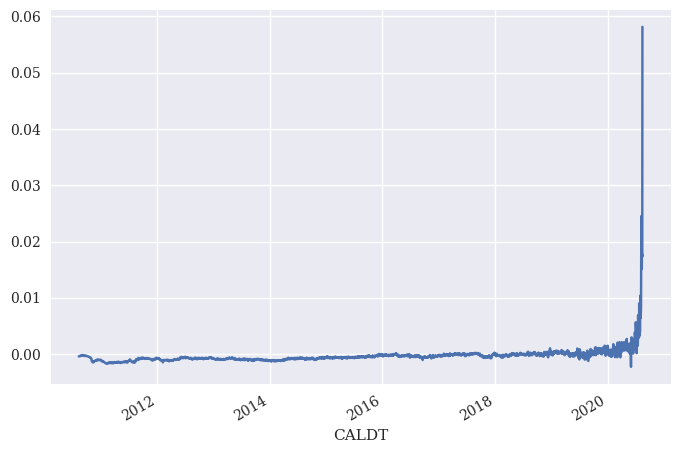

In [170]:
spread_df['spread'].plot()

## 5.3 (5pts)
Describe conceptually the risk in this trade.
* What risks are present in this trade? 
* Is it an arbitrage? 

Answer both over the next month and over the next year, until maturity.

The risks of the trade is that the spread diverges going negative. In this case both our long and short positions would be at a loss.

## 5.4 (10pts)

Suppose you use \\$1 million of equity capital on the long position, leveraged 50x to buy \\$50 million of the long position. Assume any short position will also be levered 50x. 

*You do not need to worry about the details of this financing. One could view this as a 2\% capital requirement on both the long and short positions, possibly due to haircuts and brokerage requirements. There is no difference between financing rates on the long and short positions, (so no need to consider repo rate vs brokerage account interest rate.)*

**Calculate...**
* the number of long contracts 
* the number of short contracts such that the trade is initialized with zero duration
* the dollar value of assets and of equity in each side of the trade.

In calculating the number of contracts, assume face value of \\$100 each.

In [173]:
security_metrics

KYTREASNO,204074,206169
CALDT,2019-08-29 00:00:00,2019-08-29 00:00:00
BID,106.71875,100.78125
ASK,106.742188,100.804688
Nominal_Price,106.730469,100.792969
Accrued_Interest,0.33288,0.099864
YTM,0.016565,0.017782
Duration,0.943518,0.957295
Outstanding,5118.0,34231.0
Issue_Date,1990-08-15 00:00:00,2010-08-15 00:00:00
Maturity_Date,2020-08-15 00:00:00,2020-08-15 00:00:00


In [184]:
trade_pair = pd.DataFrame(data = None,columns=['204074','206169'])
trade_pair.loc['YTM'] = [0.016565,0.017782	]
trade_pair.loc['Dirty_Price'] = security_metrics.loc['Dirty_Price'].values
trade_pair.loc['Dollar_Duration'] = security_metrics.loc['Dollar_Duration'].values

In [185]:
trade_pair

,204074,206169
YTM,0.016565,0.017782
Dirty_Price,107.063349,100.892833
Dollar_Duration,100.186385,95.733037


In [187]:
financing = pd.DataFrame(dtype='float64',index=['long','short'])
financing['haircut'] = [.02,.02]
financing['repo'] = [.0015,.0010]
financing

,haircut,repo
long,0.02,0.0015
short,0.02,0.0010


In [189]:
id_long = trade_pair.loc['YTM'].idxmin()
id_short = trade_pair.loc['YTM'].idxmax()
id_short

'206169'

In [180]:
def hedge_ratio(dollar_duration_long, dollar_duration_short, size_long = None):
    if size_long == None:
        return -dollar_duration_long/dollar_duration_short
    else:
        return (-size_long*(dollar_duration_long))/dollar_duration_short

In [181]:
LONG_EQUITY = 1e6
def trade_balance_sheet(prices, durations, haircuts, long_equity, short_equity):
    balance_sheet = pd.DataFrame(data = None,columns=['Equity','Asset_Value','Contracts','Dollar_Duration','Dirty_Price'], index = [long_equity,short_equity])
    long_price = prices.loc[long_equity]
    short_price = prices.loc[short_equity]
    duration_long = durations.loc[long_equity]
    duration_short = durations.loc[short_equity]
    haircut_short = haircuts.loc['short']
    haircut_long = haircuts.loc['long']
    balance_sheet.loc[long_equity,'Dollar_Duration'] = duration_long
    balance_sheet.loc[short_equity,'Dollar_Duration'] = duration_short
    balance_sheet.loc[long_equity,'Equity'] = LONG_EQUITY
    balance_sheet.loc[long_equity,'Asset_Value'] = 5e7
    balance_sheet.loc[long_equity,'Contracts'] = balance_sheet.loc[long_equity,'Asset_Value']/long_price
    balance_sheet.loc[short_equity,'Contracts'] = hedge_ratio(dollar_duration_long=duration_long,dollar_duration_short=duration_short,\
        size_long=balance_sheet.loc[long_equity,'Contracts'])
    balance_sheet.loc[short_equity,'Asset_Value'] = balance_sheet.loc[short_equity,'Contracts']*short_price
    balance_sheet.loc[short_equity,'Equity'] = balance_sheet.loc[short_equity,'Asset_Value']*haircut_short
    balance_sheet.loc[short_equity,'Dirty_Price'] = short_price
    balance_sheet.loc[long_equity,'Dirty_Price'] = long_price
    
    return balance_sheet

In [191]:
trade_balance_sheet(trade_pair.loc['Dirty_Price'], durations=trade_pair.loc['Dollar_Duration'], haircuts=financing['haircut'],long_equity=id_long,short_equity=id_short)

,Equity,Asset_Value,Contracts,Dollar_Duration,Dirty_Price
204074,1000000.0,50000000.0,467013.225167,100.186385,107.063349
206169,-986203.0914,-49310154.56998,-488737.932737,95.733037,100.892833


## 5.5 (10pts)

Using the concept of modified duration, how much profit or loss (PnL) would you expect to make for every basis point of convergence in the spread? 

Specifically, assume the convergence is symmetric: the long position's ytm goes down 0.5bp and the short position's ytm goes up 0.5bp. 

**Using this approximation, specify the PnL of the long position, the short position, and the net total for a 1bp convergence.**

## 5.6 (5pts)

Calculate the profit (or loss) on the position as of `2019-10-01`.

Show this separately for the long position, the short position, and the net.

Note that no coupon is paid between the trade being set up and this date; thus, the PnL is simply a matter of the position's prices.

## 5.7 (5pts)

Does the actual PnL above make sense in light of the duration-based PnL-per-bp calculated above? Give two reasons these numbers may not be aligned.

***